In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

In [2]:
from matplotlib import font_manager

font_path = '../Ruda/Ruda-VariableFont_wght.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

#### Diameter

In [3]:
def calcular_diametro(contorno):
    _, raio = cv2.minEnclosingCircle(contorno)
    diametro = raio * 2
    return diametro

def converter_para_nm(diametro_pixels, escala_nm_por_pixel):
    return diametro_pixels * escala_nm_por_pixel

In [4]:
imagem = cv2.imread('TEM/natcom_hydrogel.png')

imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

imagem_suave = cv2.GaussianBlur(imagem_gray, (5, 5), 0)

bordas = cv2.Canny(imagem_suave, 50, 150)

contornos, _ = cv2.findContours(bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

imagem_fibras = imagem.copy()

diametros_pixels = []
diametros_nm = []

escala_nm_por_pixel = 200/122

for contorno in contornos:
    cv2.drawContours(imagem_fibras, [contorno], -1, (144, 238, 144), 1)
    
    diametro_pixels = calcular_diametro(contorno)
    diametros_pixels.append(diametro_pixels)
    
    diametro_nm = converter_para_nm(diametro_pixels, escala_nm_por_pixel)
    diametros_nm.append(diametro_nm)
    
    M = cv2.moments(contorno)
    # if M["m00"] != 0:
    #     cx = int(M["m10"] / M["m00"])
    #     cy = int(M["m01"] / M["m00"])
    #     cv2.putText(imagem_fibras, f'{diametro_nm:.2f} nm', (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (173, 216, 230), 1)


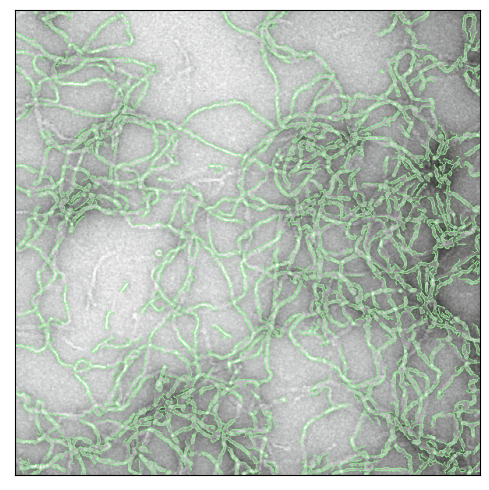

In [69]:
plt.figure(figsize=(10, 5))

plt.imshow(cv2.cvtColor(imagem_fibras, cv2.COLOR_BGR2RGB))
# plt.title('Identified Fibers',fontsize=16)

plt.xticks([])
plt.yticks([])

plt.tight_layout()

plt.savefig('results/TEM_only.png',transparent=True,dpi=800)

plt.show()

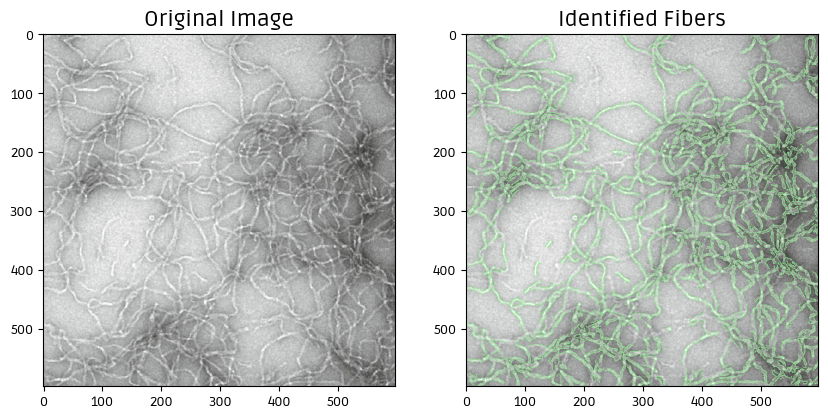

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.title('Original Image',fontsize=16)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imagem_fibras, cv2.COLOR_BGR2RGB))
plt.title('Identified Fibers',fontsize=16)

plt.savefig('results/TEM_only.png',transparent=True,dpi=800)

plt.show()

In [6]:
for i, (d_pixel, d_nm) in enumerate(zip(diametros_pixels, diametros_nm), 1):
    print(f"Fibra {i}: {d_pixel:.2f} pixels ({d_nm:.2f} nm)")

Fibra 1: 8.25 pixels (13.52 nm)
Fibra 2: 6.32 pixels (10.37 nm)
Fibra 3: 11.00 pixels (18.03 nm)
Fibra 4: 2.00 pixels (3.28 nm)
Fibra 5: 8.06 pixels (13.22 nm)
Fibra 6: 9.85 pixels (16.15 nm)
Fibra 7: 13.60 pixels (22.30 nm)
Fibra 8: 10.30 pixels (16.88 nm)
Fibra 9: 35.13 pixels (57.59 nm)
Fibra 10: 16.28 pixels (26.69 nm)
Fibra 11: 6.00 pixels (9.84 nm)
Fibra 12: 13.15 pixels (21.56 nm)
Fibra 13: 17.49 pixels (28.68 nm)
Fibra 14: 20.52 pixels (33.64 nm)
Fibra 15: 23.35 pixels (38.27 nm)
Fibra 16: 14.49 pixels (23.76 nm)
Fibra 17: 24.41 pixels (40.02 nm)
Fibra 18: 36.50 pixels (59.83 nm)
Fibra 19: 20.25 pixels (33.19 nm)
Fibra 20: 39.05 pixels (64.02 nm)
Fibra 21: 12.08 pixels (19.81 nm)
Fibra 22: 20.97 pixels (34.38 nm)
Fibra 23: 37.64 pixels (61.71 nm)
Fibra 24: 46.36 pixels (75.99 nm)
Fibra 25: 24.33 pixels (39.89 nm)
Fibra 26: 21.95 pixels (35.99 nm)
Fibra 27: 30.53 pixels (50.05 nm)
Fibra 28: 27.39 pixels (44.90 nm)
Fibra 29: 36.16 pixels (59.27 nm)
Fibra 30: 19.35 pixels (31.73 n

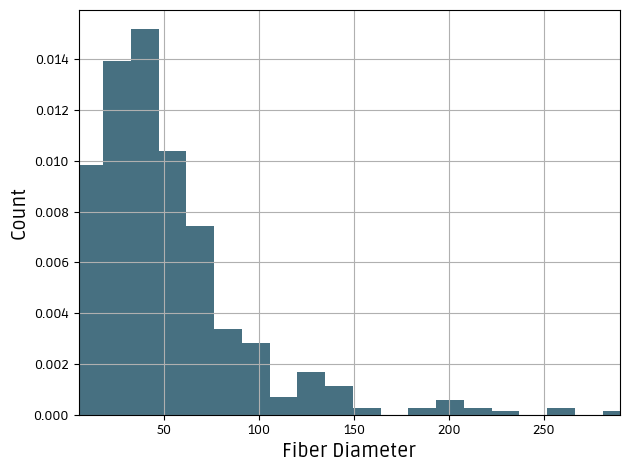

In [9]:
plt.hist(diametros_nm,density=True,bins=20,color='#477081')
plt.xlabel('Fiber Diameter',fontsize=14),plt.ylabel('Count',fontsize=14)
plt.xlim(5,290)
plt.tight_layout(),plt.grid()
plt.show()

#### Porosity

In [10]:
round(sum(diametros_nm))/(200**2)

0.63535

#### Transversal Diameter

In [11]:
def calcular_diametro_transversal(contorno):
    if len(contorno) >= 5:
        elipse = cv2.fitEllipse(contorno)
        (x, y), (largura, altura), angulo = elipse
        diametro = min(largura, altura)
    else:
        diametro = 0
    return diametro

In [12]:
imagem = cv2.imread('TEM/natcom_hydrogel.png')

imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
imagem_suave = cv2.GaussianBlur(imagem_gray, (5, 5), 0)

bordas = cv2.Canny(imagem_suave, 50, 150)
contornos, _ = cv2.findContours(bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

imagem_fibras = imagem.copy()

trans_diametros_pixels = []
trans_diametros_nm = []

escala_nm_por_pixel = 200/122

for contorno in contornos:
    cv2.drawContours(imagem_fibras, [contorno], -1, (144, 238, 144), 1)
    
    diametro_pixels = calcular_diametro_transversal(contorno)
    trans_diametros_pixels.append(diametro_pixels)
    
    diametro_nm = converter_para_nm(diametro_pixels, escala_nm_por_pixel)
    trans_diametros_nm.append(diametro_nm)
    
    M = cv2.moments(contorno)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        # cv2.putText(imagem_fibras, f'{diametro_nm:.2f} nm', (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (173, 216, 230), 1)

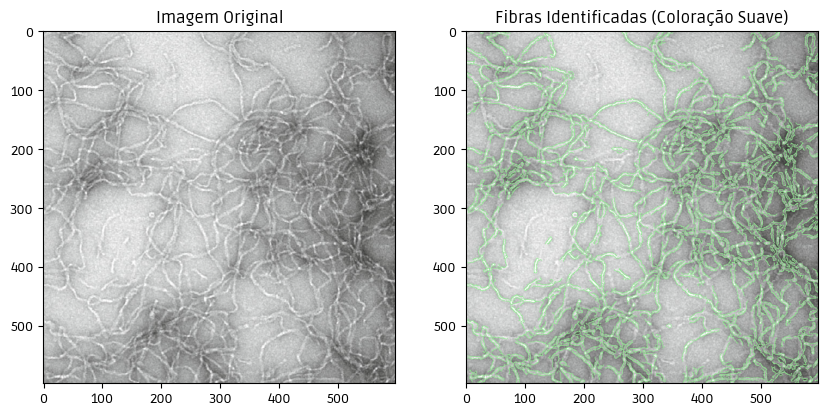

In [13]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imagem_fibras, cv2.COLOR_BGR2RGB))
plt.title('Fibras Identificadas (Coloração Suave)')

plt.show()

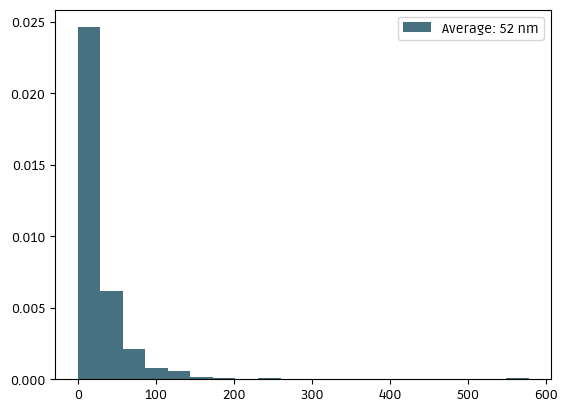

In [14]:
plt.hist(trans_diametros_nm,density=True,bins=20,color='#477081',label=f'Average: {round(np.mean(diametros_nm))} nm')
plt.legend()

In [15]:
print("Diâmetros das fibras identificadas:")
for i, (d_pixel, d_nm) in enumerate(zip(diametros_pixels, diametros_nm), 1):
    print(f"Fibra {i}: {d_pixel:.2f} pixels ({d_nm:.2f} nm)")

Diâmetros das fibras identificadas:
Fibra 1: 8.25 pixels (13.52 nm)
Fibra 2: 6.32 pixels (10.37 nm)
Fibra 3: 11.00 pixels (18.03 nm)
Fibra 4: 2.00 pixels (3.28 nm)
Fibra 5: 8.06 pixels (13.22 nm)
Fibra 6: 9.85 pixels (16.15 nm)
Fibra 7: 13.60 pixels (22.30 nm)
Fibra 8: 10.30 pixels (16.88 nm)
Fibra 9: 35.13 pixels (57.59 nm)
Fibra 10: 16.28 pixels (26.69 nm)
Fibra 11: 6.00 pixels (9.84 nm)
Fibra 12: 13.15 pixels (21.56 nm)
Fibra 13: 17.49 pixels (28.68 nm)
Fibra 14: 20.52 pixels (33.64 nm)
Fibra 15: 23.35 pixels (38.27 nm)
Fibra 16: 14.49 pixels (23.76 nm)
Fibra 17: 24.41 pixels (40.02 nm)
Fibra 18: 36.50 pixels (59.83 nm)
Fibra 19: 20.25 pixels (33.19 nm)
Fibra 20: 39.05 pixels (64.02 nm)
Fibra 21: 12.08 pixels (19.81 nm)
Fibra 22: 20.97 pixels (34.38 nm)
Fibra 23: 37.64 pixels (61.71 nm)
Fibra 24: 46.36 pixels (75.99 nm)
Fibra 25: 24.33 pixels (39.89 nm)
Fibra 26: 21.95 pixels (35.99 nm)
Fibra 27: 30.53 pixels (50.05 nm)
Fibra 28: 27.39 pixels (44.90 nm)
Fibra 29: 36.16 pixels (59.27

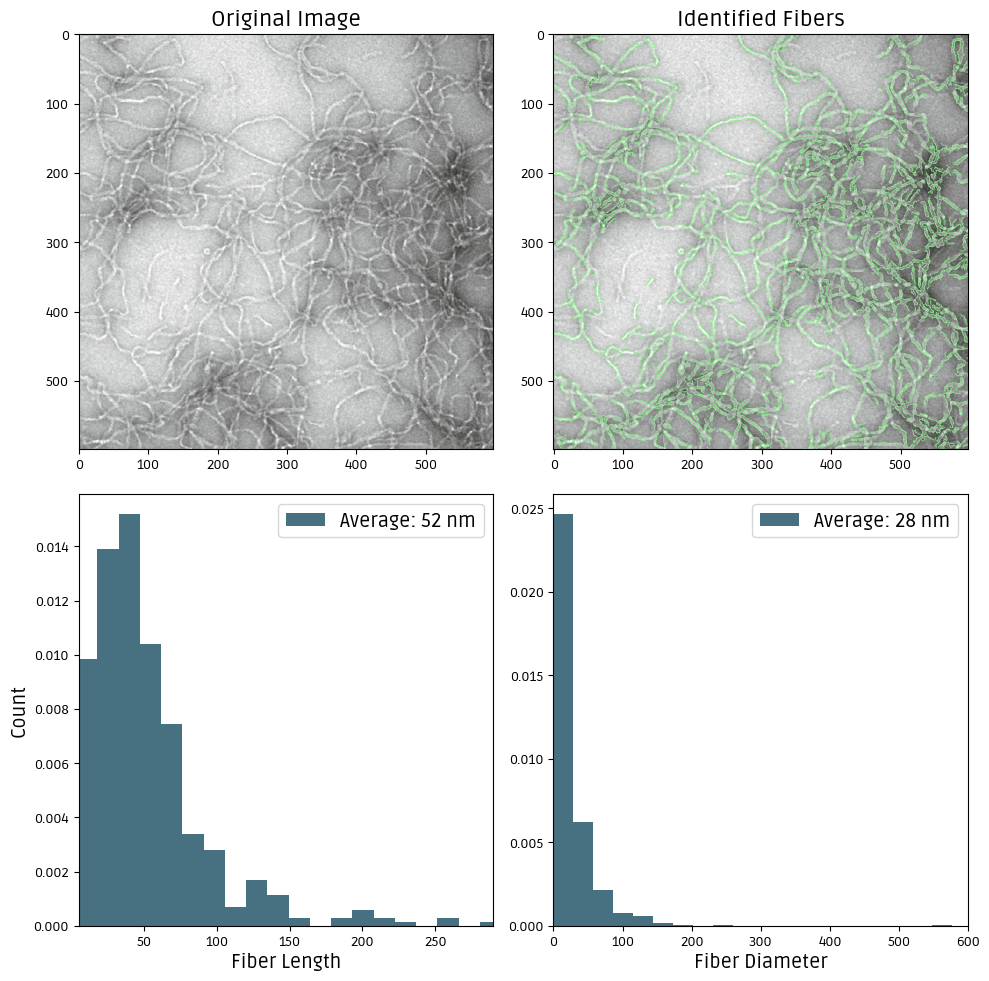

In [17]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.title('Original Image',fontsize=16)

plt.subplot(222)
plt.imshow(cv2.cvtColor(imagem_fibras, cv2.COLOR_BGR2RGB))
plt.title('Identified Fibers',fontsize=16)

plt.subplot(223)

plt.hist(diametros_nm,density=True,bins=20,color='#477081',label=f'Average: {round(np.mean(diametros_nm))} nm')
plt.xlabel('Fiber Length',fontsize=14),plt.ylabel('Count',fontsize=14)
plt.xlim(5,290)
# plt.grid()
plt.legend(fontsize=14)

plt.subplot(224)
plt.hist(trans_diametros_nm,density=True,bins=20,color='#477081',label=f'Average: {round(np.mean(trans_diametros_nm))} nm')
plt.xlabel('Fiber Diameter',fontsize=14)#,plt.ylabel('Count',fontsize=14)
plt.xlim(0,600)

# plt.grid()
plt.legend(fontsize=14)
plt.tight_layout()

# plt.savefig('results/TEM.png',transparent=True,dpi=800)

plt.show()

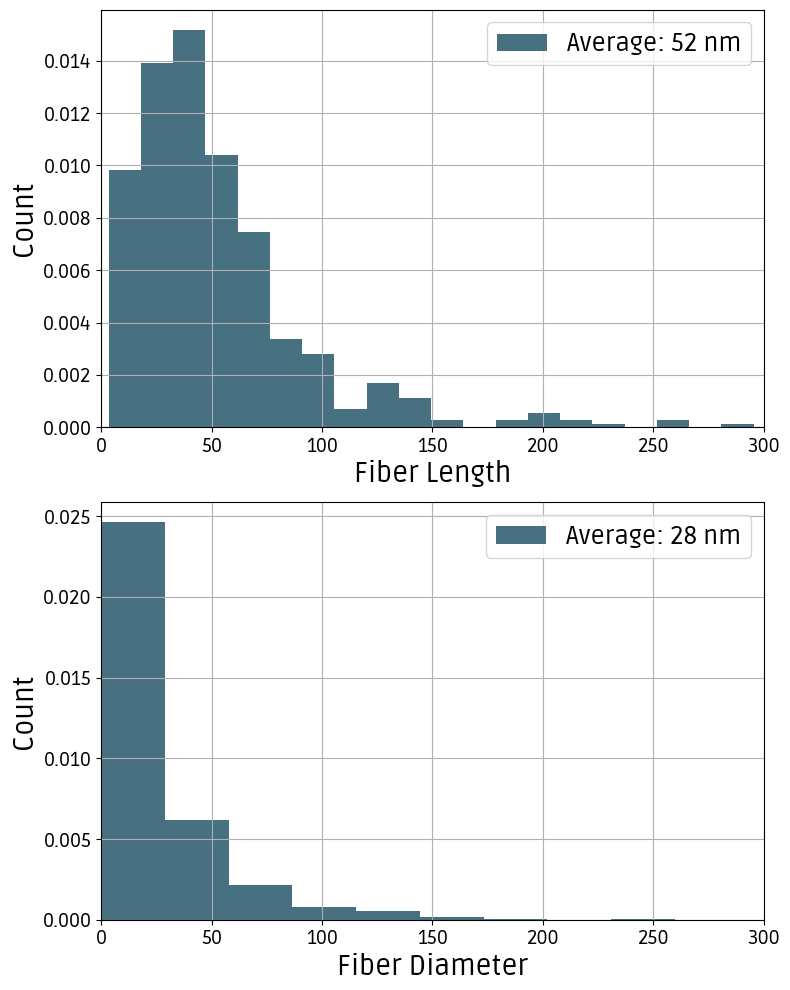

In [66]:
plt.figure(figsize=(8,10))

plt.subplot(211)

plt.hist(diametros_nm,density=True,bins=20,color='#477081',label=f'Average: {round(np.mean(diametros_nm))} nm')
plt.xlabel('Fiber Length',fontsize=20),plt.ylabel('Count',fontsize=20)
plt.xlim(0,300)
plt.grid()
plt.legend(fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(212)
plt.hist(trans_diametros_nm,density=True,bins=20,color='#477081',label=f'Average: {round(np.mean(trans_diametros_nm))} nm')
plt.xlabel('Fiber Diameter',fontsize=20),plt.ylabel('Count',fontsize=20)
plt.xlim(0,300)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid()
plt.legend(fontsize=18)
plt.tight_layout()

plt.savefig('results/results_TEM.svg',transparent=True,dpi=800)

plt.show()